In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Task 1: Merge 12 months of sales into a single file

In [2]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_list = []

for m in months:
    sales_list.append(pd.read_csv('Sales_' + m + '_2019.csv'))

sales = pd.concat(sales_list, keys=months)
sales.head()

Order ID                   Product Quantity Ordered Price Each  \
January 0   141234                    iPhone                1        700   
        1   141235  Lightning Charging Cable                1      14.95   
        2   141236          Wired Headphones                2      11.99   
        3   141237          27in FHD Monitor                1     149.99   
        4   141238          Wired Headphones                1      11.99   

               Order Date                       Purchase Address  
January 0  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
        1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
        2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
        3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
        4  01/25/19 11:59          387 10th St, Austin, TX 73301

#### Task 2: Add a Month column

In [4]:
if not 'Month' in sales.columns:
    sales.insert(4, 'Month', 0)

for m,i in zip(months, range(1,13)):
    sales.loc[m, 'Month'] = i

sales.head()

Order ID                   Product Quantity Ordered Price Each  \
January 0   141234                    iPhone                1        700   
        1   141235  Lightning Charging Cable                1      14.95   
        2   141236          Wired Headphones                2      11.99   
        3   141237          27in FHD Monitor                1     149.99   
        4   141238          Wired Headphones                1      11.99   

           Month      Order Date                       Purchase Address  
January 0      1  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
        1      1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
        2      1  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
        3      1  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
        4      1  01/25/19 11:59          387 10th St, Austin, TX 73301

#### Task 3: Find NaN rows

In [5]:
#sales_null = sales[sales.isnull().any(axis=1)]

sales = sales.dropna()
#sales.loc['April'].head()

#### Task 4: Convert values of 'Price Each' and 'Quantity Ordered' to numerical

In [6]:
#sales_invalid_price = sales['Price Each'].apply(lambda x: not isinstance(x,(int,float)))
#sales_invalid_price.head()

sales = sales.loc[sales['Price Each'] != 'Price Each'] # clean up
sales['Price Each'] = sales['Price Each'].astype(float) # could have used pd.to_numeric(sales['Price Each'])
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype(int)
#sales.head()

#### Task 5: Add a 'Order Total' column

In [7]:
if not 'Order Total' in sales.columns:
    sales.insert(4, 'Order Total', 0)

sales['Order Total'] = sales['Quantity Ordered'] * sales['Price Each']
#sales.head()

### Question 1: What was the best month for sales? How much was earned that month?

In [8]:
month_sales = sales.groupby('Month').sum()
month_sales = month_sales.drop(['Quantity Ordered', 'Price Each'], axis=1)
month_sales['Total Rounded'] = round(month_sales['Order Total']/1000000, 2)
month_sales['$ (millions)'] = '$ ' + (month_sales['Order Total']/1000000).round(2).astype(str) + ' M'

month_sales.head(12)

,Order Total,Total Rounded,$ (millions)
Month,,,
1,1.815335e+06,1.82,$ 1.82 M
2,2.203481e+06,2.20,$ 2.2 M
3,2.809063e+06,2.81,$ 2.81 M
4,3.396059e+06,3.40,$ 3.4 M
5,3.144585e+06,3.14,$ 3.14 M
6,2.578293e+06,2.58,$ 2.58 M
7,2.646900e+06,2.65,$ 2.65 M
8,2.244412e+06,2.24,$ 2.24 M
9,2.098817e+06,2.10,$ 2.1 M


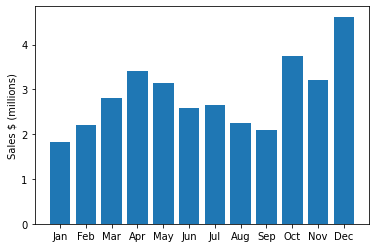

In [9]:
plt.bar([s[:3] for s in months], month_sales['Total Rounded'])
plt.ylabel('Sales $ (millions)')
plt.show()

A: December, with $ 4.62 M earned.

#### Task 6: Add a 'City' column

In [10]:
sales['City'] = sales['Purchase Address'].apply(lambda s: s.split(', ')[1])
#sales.head()

#### Task 7: Add a 'State' column

In [11]:
def get_state(s):
    return s.split(', ')[2][:2]

sales['State'] = sales['Purchase Address'].apply(get_state)
#sales.head()

#### Task 8: Unify City and State

In [12]:
sales['City'] = sales['City'] + ' ' + sales['State']
sales = sales.drop(['State'], axis=1)
#sales.head()

### Question 2: What city had the highest number of sales?

In [13]:
city_sales = sales.groupby('City').sum()
city_sales = city_sales.drop(['Quantity Ordered', 'Price Each', 'Month'], axis=1)
city_sales['Total Rounded'] = round(city_sales['Order Total']/1000000, 2)
city_sales['$ (millions)'] = '$ ' + (city_sales['Order Total']/1000000).round(2).astype(str) + ' M'

city_sales.head(9)

,Order Total,Total Rounded,$ (millions)
City,,,
Atlanta GA,2.795499e+06,2.80,$ 2.8 M
Austin TX,1.819582e+06,1.82,$ 1.82 M
Boston MA,3.661642e+06,3.66,$ 3.66 M
Dallas TX,2.767975e+06,2.77,$ 2.77 M
Los Angeles CA,5.452571e+06,5.45,$ 5.45 M
New York City NY,4.664317e+06,4.66,$ 4.66 M
Portland ME,4.497583e+05,0.45,$ 0.45 M
Portland OR,1.870732e+06,1.87,$ 1.87 M
San Francisco CA,8.262204e+06,8.26,$ 8.26 M


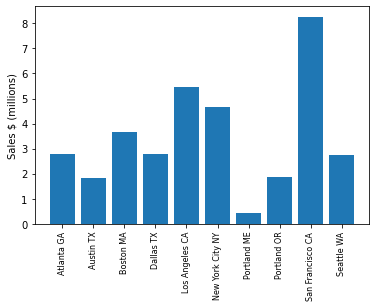

In [14]:
cities = sorted(sales['City'].unique())

plt.bar(cities, city_sales['Total Rounded'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales $ (millions)')
plt.show()

A: San Francisco CA, $ 8.26 M in sales.

#### Task 9: Convert 'Order Date' to datetime objects

In [15]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

#### Task 10: Add Hour and Minute columns

In [16]:
if not 'Hour' in sales.columns:
    sales.insert(7, 'Hour', 0)

if not 'Minute' in sales.columns:
    sales.insert(8, 'Minute', 0)

sales['Hour'] = sales['Order Date'].dt.hour
sales['Minute'] = sales['Order Date'].dt.minute
#sales.head()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

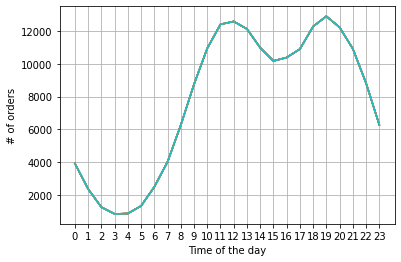

In [18]:
hours = [h for h,df in sales.groupby('Hour')]

plt.plot(hours, sales.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Time of the day')
plt.ylabel('# of orders')
plt.grid()
plt.show()

A: Around 11 and 18, right before the top of sales

#### Task 11: Create a new DataFrame containing orders with 2 or more items

In [19]:
multi_item_sales = sales[sales['Order ID'].duplicated(keep=False)]

multi_item_sales['Grouped Products'] = multi_item_sales.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

multi_item_sales = multi_item_sales[['Order ID', 'Grouped Products']].drop_duplicates()

#multi_item_sales.head()

<ipython-input-19-39bdf92f384b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_item_sales['Grouped Products'] = multi_item_sales.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


### Question 4: What products are most often sold togheter?

In [20]:
from itertools import combinations
from collections import Counter

cntr = Counter()

for row in multi_item_sales['Grouped Products']:
    row_list = row.split(',')
    cntr.update(Counter(combinations(row_list, 2)))

for pair,cnt in cntr.most_common(10):
    print(pair, cnt)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


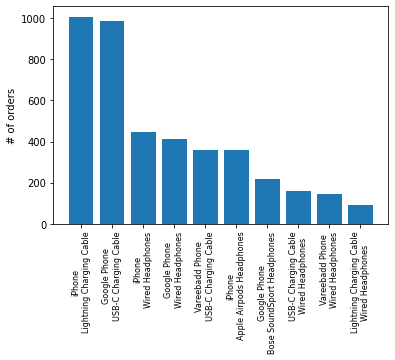

In [21]:
plot_list = list(zip(*[(it1+'\n'+it2, cnt) for (it1,it2),cnt in cntr.most_common(10)]))

plt.bar(*plot_list)
plt.xticks(plot_list[0], rotation='vertical', size=8)
plt.ylabel('# of orders')
plt.show()

A: iPhone and Lightning Charging Cable, that were ordered 1005 times togheter

### Question 5? What product sold the most? Why do you think it sold the most?

In [22]:
product_sales = sales.groupby('Product').sum()
product_sales.drop(['Price Each', 'Order Total', 'Month', 'Hour', 'Minute'], axis=1, inplace=True)
product_sales

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


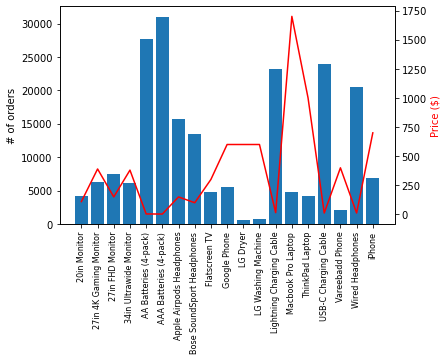

In [106]:
products = sorted(sales['Product'].unique())
prices = sales.groupby('Product').mean()['Price Each']

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, product_sales['Quantity Ordered'])
ax2.plot(products, prices, color='r')

ax1.set_ylabel('# of orders')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()

A: 4-pack of AAA Batteries was ordered more than 31 thousand times, as they are cheap.